In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np

In [2]:
df = pd.read_csv("datasets/Consumer_Complaints.csv")

In [3]:
len(df)

1045879

In [4]:
df = df.head(10000)

In [5]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]

In [6]:
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [7]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [8]:
df['category_id'] = df['Product'].factorize()[0]

In [9]:
df.head(10)

,Product,Consumer_complaint_narrative,category_id
0,Mortgage,NaN,0
1,Credit reporting,I have outdated information on my credit repor...,1
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,2
3,Credit card,NaN,3
4,Debt collection,NaN,4
5,Mortgage,NaN,0
6,Debt collection,NaN,4
7,Credit reporting,An account on my credit report has a mistaken ...,1
8,Mortgage,NaN,0
9,Mortgage,NaN,0


In [10]:
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

In [11]:
category_id_df

,Product,category_id
0,Mortgage,0
1,Credit reporting,1
2,Consumer Loan,2
3,Credit card,3
4,Debt collection,4
11,Student loan,5
21,Bank account or service,6
90,Other financial service,7
92,Prepaid card,8
101,Money transfers,9


In [12]:
category_to_id = dict(category_id_df.values)
category_to_id

{'Bank account or service': 6,
 'Checking or savings account': 10,
 'Consumer Loan': 2,
 'Credit card': 3,
 'Credit card or prepaid card': 14,
 'Credit reporting': 1,
 'Credit reporting, credit repair services, or other personal consumer reports': 11,
 'Debt collection': 4,
 'Money transfer, virtual currency, or money service': 13,
 'Money transfers': 9,
 'Mortgage': 0,
 'Other financial service': 7,
 'Payday loan': 12,
 'Prepaid card': 8,
 'Student loan': 5,
 'Vehicle loan or lease': 15}

In [13]:
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
id_to_category

{0: 'Mortgage',
 1: 'Credit reporting',
 2: 'Consumer Loan',
 3: 'Credit card',
 4: 'Debt collection',
 5: 'Student loan',
 6: 'Bank account or service',
 7: 'Other financial service',
 8: 'Prepaid card',
 9: 'Money transfers',
 10: 'Checking or savings account',
 11: 'Credit reporting, credit repair services, or other personal consumer reports',
 12: 'Payday loan',
 13: 'Money transfer, virtual currency, or money service',
 14: 'Credit card or prepaid card',
 15: 'Vehicle loan or lease'}

In [14]:
df.head()

,Product,Consumer_complaint_narrative,category_id
0,Mortgage,NaN,0
1,Credit reporting,I have outdated information on my credit repor...,1
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,2
3,Credit card,NaN,3
4,Debt collection,NaN,4


In [15]:
# remove NaN narratives as they don't help

df.dropna(inplace=True, subset=['Consumer_complaint_narrative'])
df.head()

,Product,Consumer_complaint_narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,1
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,2
7,Credit reporting,An account on my credit report has a mistaken ...,1
12,Debt collection,This company refuses to provide me verificatio...,4
16,Debt collection,This complaint is in regards to Square Two Fin...,4


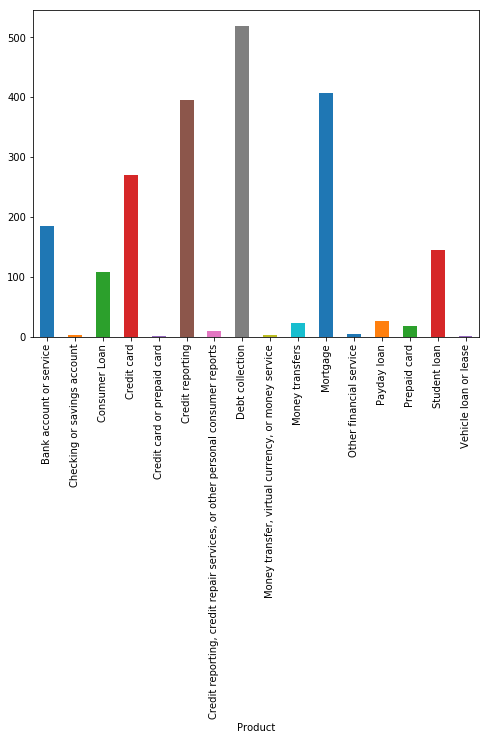

In [16]:
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [17]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [18]:
df.head()

,Product,Consumer_complaint_narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,1
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,2
7,Credit reporting,An account on my credit report has a mistaken ...,1
12,Debt collection,This company refuses to provide me verificatio...,4
16,Debt collection,This complaint is in regards to Square Two Fin...,4


In [19]:
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(2114, 6078)

In [39]:
category_to_id

{'Bank account or service': 6,
 'Checking or savings account': 10,
 'Consumer Loan': 2,
 'Credit card': 3,
 'Credit card or prepaid card': 14,
 'Credit reporting': 1,
 'Credit reporting, credit repair services, or other personal consumer reports': 11,
 'Debt collection': 4,
 'Money transfer, virtual currency, or money service': 13,
 'Money transfers': 9,
 'Mortgage': 0,
 'Other financial service': 7,
 'Payday loan': 12,
 'Prepaid card': 8,
 'Student loan': 5,
 'Vehicle loan or lease': 15}

In [40]:
len(category_to_id)

16

In [22]:
N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
       . checking
       . atm
  . Most correlated bigrams:
       . overdraft fees
       . checking account
# 'Checking or savings account':
  . Most correlated unigrams:
       . 18
       . pdf
  . Most correlated bigrams:
       . days receive
       . week xx
# 'Consumer Loan':
  . Most correlated unigrams:
       . car
       . vehicle
  . Most correlated bigrams:
       . personal loan
       . ally financial
# 'Credit card':
  . Most correlated unigrams:
       . citi
       . card
  . Most correlated bigrams:
       . annual fee
       . credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . soc
       . basic
  . Most correlated bigrams:
       . xxxx soc
       . dob xx
# 'Credit reporting':
  . Most correlated unigrams:
       . experian
       . equifax
  . Most correlated bigrams:
       . information credit
       . credit report
# 'Credit reporting, credit repair services, or other 

## Naive Bayes

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [24]:
my_sentence = "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."

print(clf.predict(count_vect.transform([my_sentence])))

['Debt collection']


In [25]:
my_sentence = "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"

print(clf.predict(count_vect.transform([my_sentence])))

['Debt collection']


In [26]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id
12,Debt collection,This company refuses to provide me verificatio...,4


In [27]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id
61,Credit reporting,I am disputing the inaccurate information the ...,1


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\jacky.zhao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jacky.zhao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jacky.zhao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jacky.zhao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn

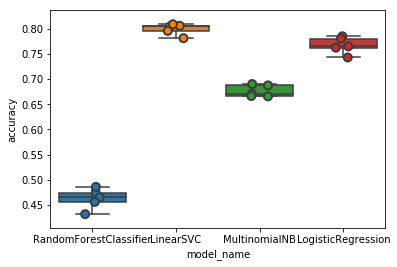

In [29]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [30]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.799840
LogisticRegression        0.767644
MultinomialNB             0.676428
RandomForestClassifier    0.462122
Name: accuracy, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

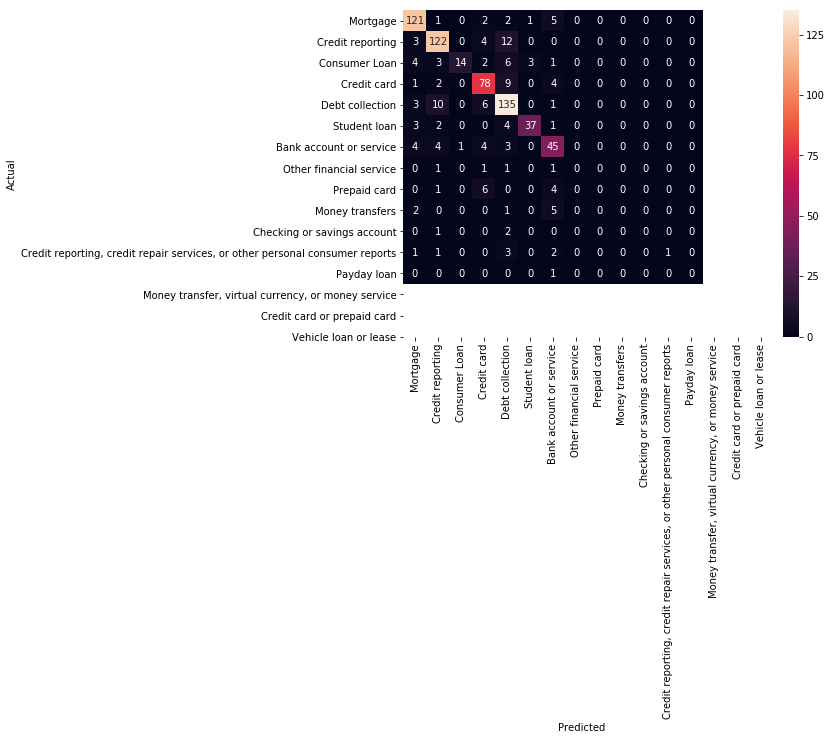

In [32]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [37]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [38]:
len(model.coef_)

16

In [34]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Product))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . account
  . Top bigrams:
       . debit card
       . sent money
# 'Checking or savings account':
  . Top unigrams:
       . data
       . bonus
  . Top bigrams:
       . week xx
       . 300 00
# 'Consumer Loan':
  . Top unigrams:
       . vehicle
       . car
  . Top bigrams:
       . 2600 00
       . personal loan
# 'Credit card':
  . Top unigrams:
       . card
       . discover
  . Top bigrams:
       . credit card
       . synchrony bank
# 'Credit card or prepaid card':
  . Top unigrams:
       . basic
       . assigned
  . Top bigrams:
       . dob xx
       . xxxx soc
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . transunion
  . Top bigrams:
       . xxxx account
       . xxxx reported
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . didn
       . ignoring
  . Top bigrams:
       . union xxxx
       . valid xxxx
# 'Debt collection'

In [35]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]

text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Mortgage'

"I can't get the money out of the country."
  - Predicted as: 'Bank account or service'

"I have no money to pay my tuition"
  - Predicted as: 'Debt collection'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Bank account or service'



In [36]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                            Credit reporting       0.85      0.92      0.88       132
                                                               Consumer Loan       0.82      0.87      0.84       141
                                                             Debt collection       0.93      0.42      0.58        33
                                                                    Mortgage       0.76      0.83      0.79        94
                                                                 Credit card       0.76      0.87      0.81       155
                                                     Other financial service       0.90      0.79      0.84        47
                                                     Bank account or service       0.64      0.74      0.69        61
                                                       

C:\Users\jacky.zhao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 13, does not match size of target_names, 16
  .format(len(labels), len(target_names))
C:\Users\jacky.zhao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
